$\color{green}{\text{This notebook is best viewed in jupyter notebook}}$

# Lab 3 (Weeks 8,9): k-Means Clustering

<div class="alert alert-block alert-warning">

<b>Enter you credentials below</b>

- <b>Student Name:</b> Dhruv Anand
- <b>Student ID:</b> 30462452
- <b>Date:</b> April 24, 2022
    

![unsup2.jpg](img/ML.jpg)

## Unsupervised Learning

As the name suggests, unsupervised learning is a type of machine learning in which the training of a model is not supervised using labels of the training dataset. Instead, models themselves attempt to find hidden patterns and insights from the given data. Unsupervised learning cannot be directly applied to a regression or classification problem because unlike supervised learning, we have the input data but no corresponding output data (no labels). The goal of unsupervised learning is to find the underlying structure of the dataset, group that data according to similarities, and represent the data in a compressed format.

## Clustering

Clustering is a type of unsupervised learning which involves grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. Some examples of popular clustering algorithms are:
- K-Means Clustering
- Spectral Clustering
- Mean-Shift Clustering
- DBSCAN
- Gaussian Mixture Models

## K-Means Clustering

K-Means Clustering is one of the simplest unsupervised machine learning algorithms. You will first decide a number *k*, which corresponds to the number of clusters that you desire to have in your dataset. This number will also correspond to the number of centroids. A centroid is the location representing the center of a cluster. Each data point in your dataset is allocated to a specific cluster following a set of rules in an iterative manner. Also, the locations of the centroids are updated subsequently by averaging the data points assigned to the respective cluster. The **‘means’** in the k-Means Clustering refers exactly to this method of updating each cluster centroid.

![kmeans_anim.gif](img/kmeans_anim.gif)

## What you should do in this lab exercise!

In this laboratory exercise, you will create a program that clusters and re-colours each pixel in a provided colour image to **k** mean colours using the k-means clustering algorithm. In all of the tasks below, you may not use any pre-written libraries for k-Means Clustering (e.g. **no** scikit-learn), instead you should use your knowledge of python and numpy to build your own code to perform k-Means Clustering. Your end result of the clustered image should look something like the one shown below.

*Hint*: If you cannot see the displayed image '*objective.png*', have a look into the provided '*img*' folder.

![objective.png](img/objective.png)

<div class="alert alert-block alert-warning">
    
You are going to work on the following five tasks throughout this lab. *Each task in this lab exercise is worth 2% of your final unit grade (total 10%)*.

- **Task 1** : Distance Function
- **Task 2** : k-Means Clustering
- **Task 3** : Visualization of centroids
- **Task 4** : k-Means++ Initialization
- **Task 5** : Comparison between Random Initialization and k-Means++ Initialization
    
</div>

In [1]:
# As always, we first import several libraries that will be helpful to solve the tasks
# Important: You are only allowed to use cv2 to import images, but you may NOT use the contained k-means implementation
import random
import copy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np     
import cv2
import time
from IPython.display import clear_output
from matplotlib.colors import ListedColormap
import sys

<div class="alert alert-block alert-info">

## Task 1: Distance function
In this task, you wil build a helper function to compute the squared distance from a set of data points to a set of mean values (*aka* centroids). You are given a small dataset of five data points and two centroids for testing. Using your 'dist2c' function, you will compute distances from each centroid to every data point. Finally, you will visualize your results and check whether your distances are correct by assigning the data points to the closest centroid and displaying the results.
    
</div>

Write your own **dist2c** function, which takes a set of data points ('*data*') and a set of means ('*centroids*') and computes the squared distance from each mean to every data point.

In [2]:
def dist2c(data, centroids):
    # The inputs and the outputs of your function should be as follows:
    # Inputs - data      : numpy array of size N x d
    #          centroids : numpy array of size c x d
    # Output - dist      : numpy array of size c x N
    # N = the number of data points, c = the number of centroids, d = dimension of data
    ### Insert your solution here ###
    dist = [[0 for i in range(len(data))] for j in range(len(centroids))]
    for i in range(len(dist)): #0,1
        for j in range(len(dist[i])): # 0,1,2,3,4
            subs = data[j] - centroids[i]
            dist[i][j] = np.sum(subs**2)

    return np.array(dist)

Now, let's check the function you wrote on the following provided data points.
- X contains five 3-dimensional data points

\begin{equation}
X = 
\begin{bmatrix}
0.67187976 & 0.44254368 & 0.17900127\\
0.55085456 & 0.65891464 & 0.18370379\\
0.79861987 & 0.3439561  & 0.68334744\\
0.36695437 & 0.15391793 & 0.81100023\\
0.22898267 & 0.58062367 & 0.5637733 
\end{bmatrix}
\end{equation}

- M contains two centroids
\begin{equation}
M = 
\begin{bmatrix}
0.66441854 & 0.08332493 & 0.54049661\\
0.05491067 & 0.94606233 & 0.29515262
\end{bmatrix}
\end{equation}

Use your **dist2c** function to compute the distances from each centroid to every data point. Print your results. If you wrote the function correctly, your answer should be close to:

\begin{bmatrix}
0.25977266 & 0.47150141 & 0.10634496 & 0.16664051 & 0.43745224\\
0.64767303 & 0.34083498 & 1.0663305 & 0.99096278 & 0.23600355
\end{bmatrix}


In [3]:
### Insert your solution here ###
X = np.array([[0.67187976, 0.44254368, 0.17900127],
              [0.55085456, 0.65891464, 0.18370379],
              [0.79861987, 0.3439561, 0.68334744],
              [0.36695437, 0.15391793, 0.81100023],
              [0.22898267, 0.58062367, 0.5637733]])

M = np.array([[0.66441854, 0.08332493, 0.54049661],[0.05491067, 0.94606233, 0.29515262]])
dist2c(X,M)

array([[0.25977266, 0.47150141, 0.10634496, 0.16664051, 0.43745224],
       [0.64767303, 0.34083498, 1.0663305 , 0.99096278, 0.23600355]])

Write a code to draw a 3D scatter plot assigning each datapoint to its closest centroid using two colors.

*Hint*: Use the '*scatter3D*' function from matplotlib, and choose a different marker (or different marker size) to indicate the cluster centroids.

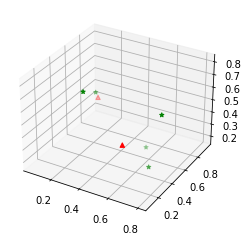

In [4]:
### Insert your solution here ###
x = X[:,0]; xm = M[:,0]
y = X[:,1]; ym = M[:,1]
z = X[:,2]; zm = M[:,2]
ax = plt.axes(projection="3d")
ax.scatter3D(x,y,z, marker='*', color='green')
ax.scatter3D(xm,ym,zm, marker='^', color='red')
# Create the plot and display the result

<div class="alert alert-block alert-success">
    
#### What do you observe here? Are the data points assigned to their closest centroid?

>Not all of the data points are assigned to the nearest centroids, we havn't done K-means yet so the centroids are not finalised. All the data points were already given, I just plotted them accordingly

</div>

<div class="alert alert-block alert-info">

## Task 2: k-Means Clustering
In this task, you will implement k-Means Clustering. First, you will write a function to generate random centroids for initialization. Then you will write a function to perform k-Means Clustering (You may want to follow the steps on the lab instructions sheet). Afterwards, you will use these functions to cluster the pixels of the provided *mandrill.jpg* image. Finally, you will display the results.
    
</div>

Write a function **random_centroids**, which takes a dataset and an integer value k (= number of centroids) as inputs, and generates k data points (i.e. the centroids) which are randomly sampled from the dataset.

In [5]:
def random_centroids(data, k):
    # The inputs and the outputs of your function should be as follows:
    # Inputs - data     : numpy array (N x d)
    #        - k        : an integer value
    # Output - centroids: numpy array (k x d)
    # N = number of data points, d = dimension of data, k = number of centroids
    
    ### Insert your solution here ###
    
    centroids = [[0 for i in range(len(data[0]))] for j in range(k)]
    for i in range(len(centroids)):
        for j in range(len(centroids[i])):
            random_i, random_j = random.randint(0,len(data)-1), random.randint(0,len(data[0])-1)
            centroids[i][j] = data[random_i][random_j]
    return np.array(centroids)

Write a function **mykMeans**, which takes a dataset, an set of k centroids and an integer value T (= number of iterations) as inputs. The function should perform k-Means Clustering on the input dataset by using the input centroids as intilization. After running for T iterations, the function should finally output a cluster index for each data point, the final set of k centroids, and the loss vector containing the k-Means loss at each iteration.(You may want to use your function **dist2c** to compute distances between centroids and data points at each iteration.)

In [6]:
def mykMeans(data, centroids, T):
    # The inputs and the outputs of your function should be as follows:
    # Inputs  - data        : numpy array (N x d)
    #         - centroids   : numpy array (k x N)
    #         - T           : integer
    # Outputs - cluster_idx : numpy array (N,)
    #         - centroids   : numpy array (k x N)
    #         - losses      : list (T)
    # N = number of data points, d = dimension of data, k = number of centroids, T = number of iterations
    # return cluster_idx, centroids, kMeans_loss
    
    ### Insert your solution here ###
    num_of_clusters = len(centroids)
    losses = []
    for _ in range(T):
        distance = dist2c(data,centroids) # Distance of all data points
        cluster_idx = np.argmin(distance, axis=0) # What data point is closest to the centroid
        
        if T == 1:
            return cluster_idx, np.array(centroids)
        centroids = []
        for i in range(num_of_clusters): # i = 0,1,2,3
            index_Cluster = np.where(cluster_idx == i)[0] #Points in cluster
            points_inCluster = [data[j] for j in index_Cluster] # All data points in a cluster
            centroids.append(np.mean(points_inCluster,axis=0))
            loss = [(points_inCluster[k]-centroids[i])**2 for k in range(len(points_inCluster))]
        losses.append(sum(sum(loss)))


    return cluster_idx, np.array(centroids), losses

Load the *mandrill.jpg* image and display it.

In [7]:
### Insert your solution here ###
image = cv2.cvtColor(cv2.imread("mandrill.jpg"),cv2.COLOR_BGR2RGB)
image_reshape = np.reshape(image,(len(image)**2,3))
randomCentroids = random_centroids(image_reshape,4)

cluster_idx, centroids, losses = mykMeans(image_reshape,randomCentroids,5)
# Load and display the colour (!) image


Now, use your **random_centroids** function to generate four random centroids. Then, use your **mykMeans** function to cluster the pixels of the *mandrill.jpg* image. (*Hint*: You may want to reshape your image before applying the **mykMeans** function.) Display the final clustered image. Each pixel should be displayed by the colour of the assigned centroid (i.e. you should only see a total of *k* colours in your clustered image).

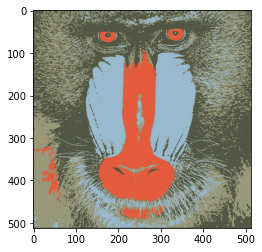

In [8]:
# Define a fixed random seed for repeatability
np.random.seed(12)

### Insert your solution here ###
# Initialize centroids, perform k-means and visualise the clustered colour image
for i in range(len(cluster_idx)):
        image_reshape[i] = centroids[cluster_idx[i]]

image_reshape_strikeBack = np.reshape(image_reshape,(512,512,3))
plt.imshow(image_reshape_strikeBack)

<div class="alert alert-block alert-success">
    
#### Have some fun with your k-Means Clusering impementation! Run the program several times with different random seeds to see if you always converge to the same solution. Try changing k from 4 to other numbers (from 2 to 10) and see how this affects the output and the repeatability of the program. Report and discuss your observations.

>Increasing number of centroids makes our image more smoother and more details into the image. This is due to, more cluster represent more changes into the image(face to hair, eyes to skin) we'll get more colors into the image. The random seeds does not effect the image much since it effects the random centroids we initially generated. Also, after T iteration the images gets more clear since centroids change their position to the mean of data points. 


</div>

<div class="alert alert-block alert-info">

## Tasks 3:  Visualization of centroids
In this task you are asked to visualize how the centroids are updated during k-Means Clustering. For that, you will write code to plot the data points along with the centroids and display both the plot and the clustered image side-by-side. Then, you will use that function inside your k-Means Clustering implementation to observe how the centroids move with each iteration. 
    
</div>

Write your own function **visualize** which takes the dataset, cluster indices, centroids and sample indices, and generates a figure of two subplots:
1. A 3D scatter plot of the datapoints and centroids.
2. A display of the clustered image

For the 3D scatter plot, the colour of each data point should reflect the colour of the closest centroid (i.e. the centroid which it is assigned to). As it is computationally expensive to plot all the data points at each iteration, you may only draw 250 randomly selected data points (to speed things up).

In [9]:
rand = random.sample(range(len(cluster_idx)), 500)
def visualize(data, cluster_idx, centroids, sample_idx, index=0, just_plot=False):
    # The inputs and the outputs of your function should be as follows:
    # Inputs  - data        : numpy array (N x d)
    #         - cluster_idx : numpy array (N,)
    #         - centroids   : numpy array (k x N)
    #         - sample_idx  : numpy array (250,)
    # Outputs - figure      : subplot (1, 2)
    # N = number of data points, d = dimension of data, k = number of centroids
    
    ### Insert your solution here ###

    if just_plot == False:
        markers = ["*","^","+","X","d","p"]
        colors = ["b","g","r","m","y","k"]

        data_3D = np.array([data[rand[i]] for i in range(sample_idx)])
        cluster_idx_3D = np.array([cluster_idx[rand[i]] for i in range(sample_idx)])

        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        # Create 3D scatter plot with corresponding colours as first sub-plot
        for i in range(len(centroids)):
            for j in range(len(cluster_idx_3D)):
                if cluster_idx_3D[j] == i:
                    ax.scatter(data_3D[j,0],data_3D[j,1],data_3D[j,2], marker=".", color=colors[i])
            ax.scatter(centroids[i,0],centroids[i,1],centroids[i,2], marker=markers[i], color=colors[i],s=200)       

        # Create visualization of the clustered image as second sub-plot
        data_vis = copy.deepcopy(data)
        for i in range(len(cluster_idx)):
            data_vis[i] = centroids[cluster_idx[i]]
        
        # # Show both visiualizations
        imageTask3 = np.reshape(data_vis,(512,512,3))
        ax = fig.add_subplot(1, 2, 2)   
        ax.imshow(imageTask3)

    else:
        markers = ["*","^","+","X","d","p"]
        colors = ["b","g","r","m","y","k"]

        data_3D = np.array([data[rand[i]] for i in range(sample_idx)])
        cluster_idx_3D = np.array([cluster_idx[rand[i]] for i in range(sample_idx)])
        fig = plt.figure(figsize=(8,8))

        if index == 1:
            ax = plt.axes(projection="3d")
            for i in range(len(centroids)):
                for j in range(len(cluster_idx_3D)):
                    if cluster_idx_3D[j] == i:
                        ax.scatter(data_3D[j,0],data_3D[j,1],data_3D[j,2], marker=".", color=colors[i])
                ax.scatter(centroids[i,0],centroids[i,1],centroids[i,2], marker=markers[i], color=colors[i],s=200)
        else:
            ax = plt.axes(projection="3d")
            for i in range(len(centroids)):
                for j in range(len(cluster_idx_3D)):
                    if cluster_idx_3D[j] == i:
                        ax.scatter(data_3D[j,0],data_3D[j,1],data_3D[j,2], marker=".", color=colors[i])
                    ax.scatter(centroids[i,0],centroids[i,1],centroids[i,2], marker=markers[i], color=colors[i],s=200)
        # Create 3D scatter plot with corresponding colours as first sub-plot

Now modify your **mykMeans** function and create a new **myKMeans_visualize** function by adding the **visualize** function that you wrote above in order to visualize the results at every iteration. 

Make sure you add a time pause of 1-2 seconds after each iteration so there is enough time for you to observe the convergence of the centroids clearly! *Hint*: the '*time*' library we imported at the beginning provides a '*sleep*' function!

In [10]:
def mykMeans_visualize(data, centroids, T):
    # The inputs and the outputs of your function should be as follows:
    # Inputs  - data        : numpy array (N x d)
    #         - centroids   : numpy array (k x N)
    #         - T           : integer
    # N = number of data points, d = dimension of data, k = number of centroids, T = number of iterations
    
    ### Insert your solution here ###
    num_of_clusters = len(centroids)
    for _ in range(T):
        distance = dist2c(data,centroids)
        centroids = []
        cluster_idx = np.argmin(distance, axis=0)
        for i in range(num_of_clusters):
            index_Cluster = np.where(cluster_idx == i)[0] #Points in cluster
            points_inCluster = [data[j] for j in index_Cluster]
            centroids.append(np.mean(points_inCluster,axis=0))
            
        visualize(data,cluster_idx,np.array(centroids),500)

Test your new **myKMeans_visualize** function on the *mandrill.jpg* image.

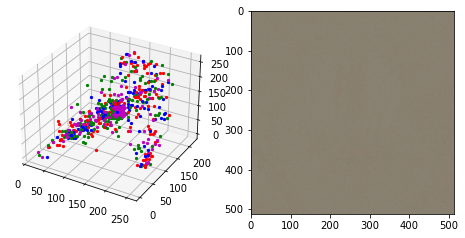

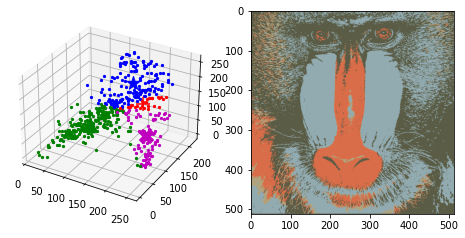

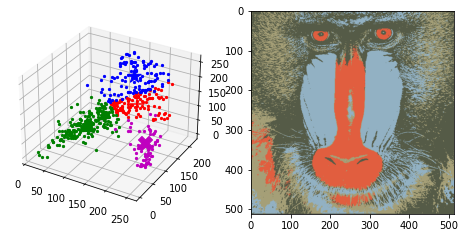

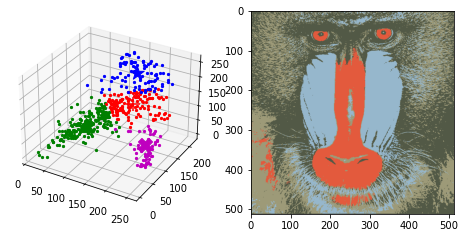

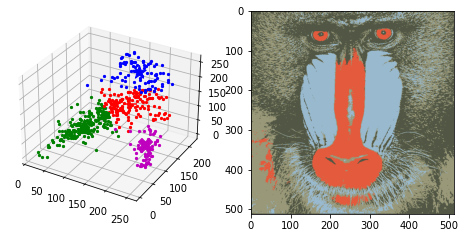

In [11]:
# Specify a random seed (will determine the random initialisation)
np.random.seed(12)

# Initialise your centroids and run your k-Means visualization function
image_Task3 = cv2.cvtColor(cv2.imread("mandrill.jpg"),cv2.COLOR_BGR2RGB)
image_Task3 = np.reshape(image_Task3,(len(image)**2,3))
mykMeans_visualize(image_Task3,randomCentroids,5)

<div class="alert alert-block alert-success">
    
#### Observe how the centroids move with each iteration. Did you see any pattern in the movement of each centroid? Report and discuss your observations!


>Centroids first start with random positioning and with each iteration it starts to move toward clusters and make clusting happen, this is due to the mean we are taking which changes the position of centroids. 

</div>

<div class="alert alert-block alert-info">

## Tasks 4: k-Means++ Initialization
    
In this task, you will implement the k-Means++ initialization of the k-Means Clustering algorithm. First, you will write a function to generate centroids for the initialization using the k-Means++ initialization procedure (You may want to follow the steps on the lab instructions sheet, and read up on the method using the provided reference). 

Then you will use the generated initial centroids together with your previous k-Means Clustering implementation to cluster the pixels of the *mandrill.jpg* image. Finally, you will display the results.   
    
</div>

Write a function **kmeanspp_centroids**, which takes a dataset and an integer value k (= number of centroids) as inputs, and generates k centroids following the k-Means++ initilization procedure. You might want to re-use your **dist2c** function here.

In [12]:
def dist1c(data,centroid):
    return np.sum((data - centroid)**2)

In [13]:
def kmeanspp_centroids(data,k):
    # The inputs and the outputs of your function should be as follows:
    # Inputs - data     : numpy array (N x d)
    #        - k        : an integer value
    # Output - centroids: numpy array (k x N)
    # N = number of data points, d = dimension of data, k = number of centroids
    
    ### Insert your solution here ###
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0]), :])

    for _ in range(k-1):
        distance = []
        for i in range(len(data)):
            point = data[i,:]
            d = sys.maxsize

            for j in range(len(centroids)):
                temp_dist = dist1c(point,centroids[j])
                d = min(d, temp_dist)
            distance.append(d)
        
        distance = np.array(distance)
        next_centroid = data[np.argmax(distance), :]
        centroids.append(next_centroid)
        distance = []
    
    return centroids


In [14]:
image_T4 = cv2.cvtColor(cv2.imread("mandrill.jpg"),cv2.COLOR_BGR2RGB)
image_Task4 = np.reshape(image_T4,(len(image)**2,3))

Now, use your **kmeanspp_centroids** function to generate four random centroids. Then, use your **mykMeans** function to cluster the pixels of the *mandrill.jpg* image. (You may want to reshape your image before applying the **mykMeans** function.) Display the final clustered image.

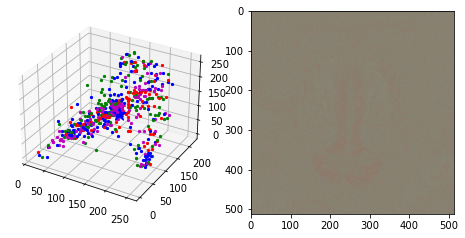

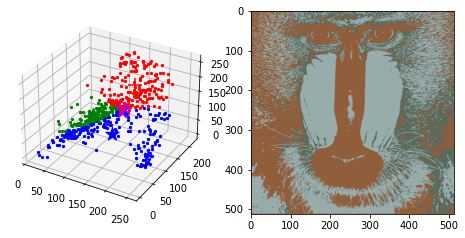

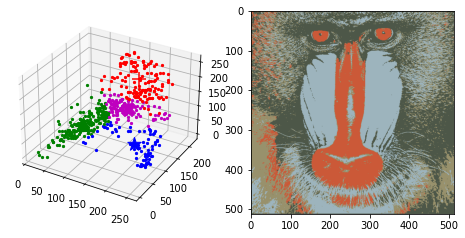

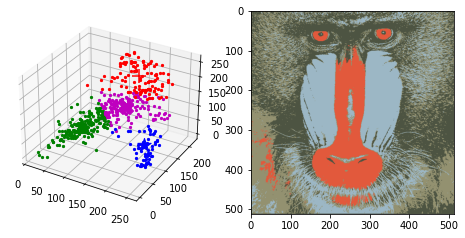

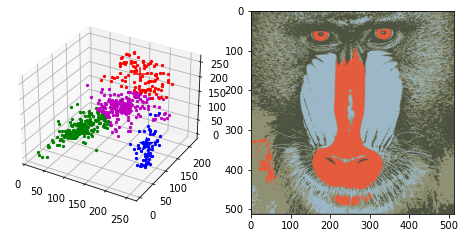

In [15]:
# We first specify our random seed here
np.random.seed(0)

### Insert your solution here ###

# Initialise the centroids with the kmeans++ method, and run the clustering
kmeanspp = kmeanspp_centroids(image_Task4,4)

# Display your results (image)
mykMeans_visualize(image_Task4, kmeanspp, 5)

<div class="alert alert-block alert-success">
    
#### Were you able to obtain the same results (the same clustered mandrill image) as you did with the random initialization, or do they differ significantly? Were you able to obtain the results faster than with the random initialization? Report your findings, and explain why you think this happens!

>Yes, the final image we obtain after both initialization were the same, the only thing that I observed was different is the iterations it took to get more accurate, means how long it took for myKmeans clustering to get most closer to the actual image. I obtained results faster with kmeans++ initialization.

</div>

<div class="alert alert-block alert-info">
    
## Tasks 5: Comparison between Random Initialization and k-Means++ Initialization
    
In this task, you will visualize the effects of random initialization and k-Means++ initialization by plotting the initially generated centroids with respect to the final clustering result of all data points. Also, you will observe the loss of k-Means Clustering and how the two types of initializations affect the convergence of the algorithm.
    
    
</div>

In [16]:
# We are setting a fixed seed here
np.random.seed(5)
image_T5 = cv2.cvtColor(cv2.imread("mandrill.jpg"),cv2.COLOR_BGR2RGB)
image_Task5 = np.reshape(image_T5,(len(image)**2,3))

Use random initialization to cluster the pixels of the *mandrill.png* image.

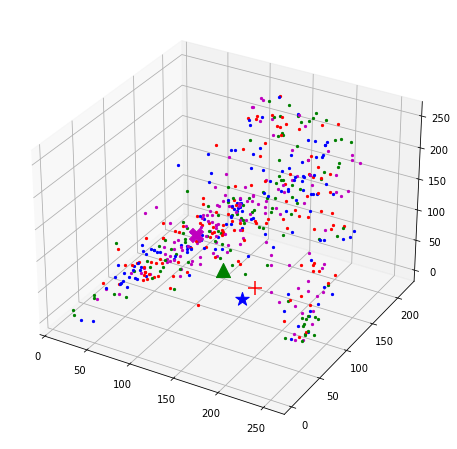

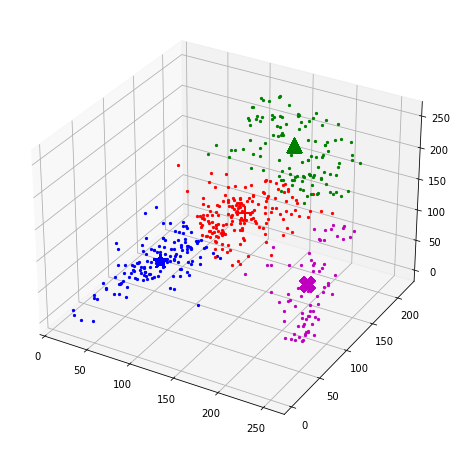

In [17]:
### Insert your solution here ###
randomCentroids = random_centroids(image_Task5,4)
cluster_idx_1, initialCentroids = mykMeans(image_Task5,randomCentroids,1)
cluster_idx_2, finalCentroids, losses_rand = mykMeans(image_Task5,randomCentroids,20)
for i in range(2):
    if i == 0:
        visualize(image_Task5,cluster_idx_1,initialCentroids,500,i+1,just_plot=True)
    else:
        visualize(image_Task5,cluster_idx_2,finalCentroids,500,i+1,just_plot=True)
# Randomly initialize the centroids and obtain the clustering results -- you can choose T=20 iterations to start with


Use k-Means++ initialization to cluster the pixels of the *mandrill.png* image.

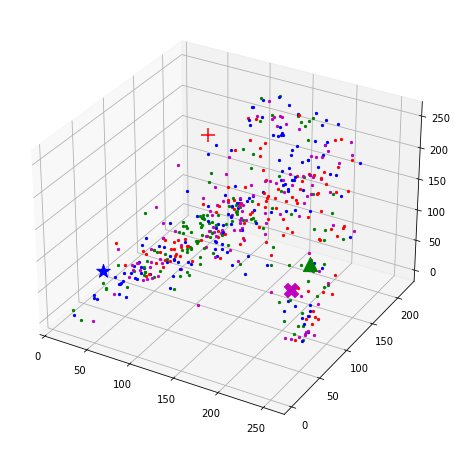

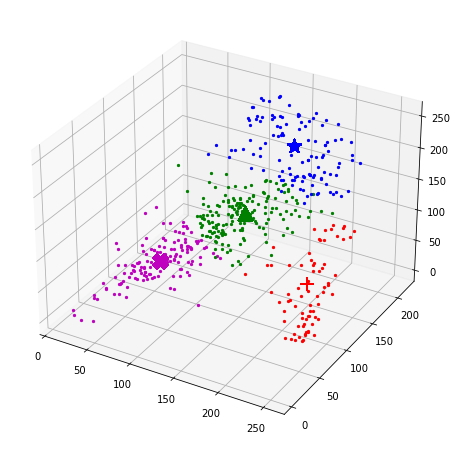

In [18]:
### Insert your solution here ###

# Initialize the centroids via k-Means++ and obtain the clustering results -- you can choose T=20 iterations to start with
kmeanspp = kmeanspp_centroids(image_Task5,4)
cluster_idx_1, initialCentroids = mykMeans(image_Task5,kmeanspp,1)
cluster_idx_2, finalCentroids, losses_pp = mykMeans(image_Task5,kmeanspp,20)
for i in range(2):
    if i == 0:
        visualize(image_Task5,cluster_idx_1,initialCentroids,500,i+1,just_plot=True)
    else:
        visualize(image_Task5,cluster_idx_2,finalCentroids,500,i+1,just_plot=True)


Plot the generated centroids from each initialization method together with the final clustering result of the data points (by using corresponding centroid colours). You may want generate a side-by-side plot for easier comparison of the two methods (e.g. via subplots).

Observe the location of the initial centroids of random initialization and the K-means++ method!

Plot the loss of the two k-Means Clustering methods over the number of iterations. You may want plot the loss curves of the two methods in the same plot for convenience of comparison.

Text(0.5, 1.0, 'Loss vs Iterations')

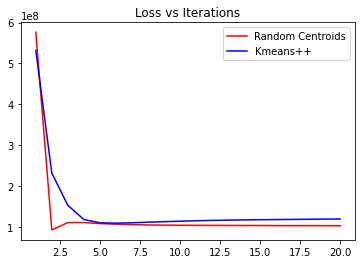

In [20]:
### Insert your solution here ###
plt.plot([i+1 for i in range(20)],losses_rand, color="red", label = "Random Centroids")
plt.plot([i+1 for i in range(20)], losses_pp, color="blue", label = "Kmeans++")
plt.legend()
plt.title("Loss vs Iterations")
#Create the loss plots and display the results


<div class="alert alert-block alert-success">
    
#### From your results, discuss the main differences between random initialization and k-Means++ initialization. What do you notice regarding the position of the initial centroids? Which one do you think is better, and why? What do you observe regarding the loss and convergence of both methods? Discuss the pros and cons of the two methods.

>Kmeans++ initialization converges much quicker than Random initialization. The main difference is, in Random initialization we pick random centroids at the start as the name suggest but in kmeans++ initialization, we first pick random centroid then compute distance between all data points and that centroid and choose the next centroid that is most furthest from that previous centroid, repeat this until we have k centroids. Position of random centroids are random all the time but position of kmean++ centroids are always away from each other, in other words you will never find them together or near. I think kmeans++ is more efficient since probability of being a centroid increses as you increse the distance, unlike in random centroids where all k centroids can be together to each other.
#####
>Pros of Kmeans++:
- It converges faster
>Pros of Random initialization:
- Less computing power 
>Cons for Kmeans++ and Random initialization:
- Very much dependent on the initialization of the centroids or the mean points.

</div>

<div class="alert alert-block alert-warning">
    
# <center> That is all for this Lab!
    
</div>